In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [55]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

In [56]:
data = pd.read_csv(url)

In [57]:
data.to_csv('fuel_ferc.csv')

In [58]:
df = pd.read_csv('fuel_ferc.csv')

In [59]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [60]:
df.shape

(29523, 12)

In [61]:
df.dtypes

Unnamed: 0                        int64
record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [62]:
df.isna().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [86]:
df.isna().mean()*100

Unnamed: 0                      0.000000
record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
Total_cost_of_fuel_burnt        0.000000
excess_fuel                     0.000000
dtype: float64

In [63]:
#drop rows with null values 
df2 = df.dropna(axis=0)

In [64]:
df2.isna().sum()

Unnamed: 0                      0
record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [65]:
df2.head(2)

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


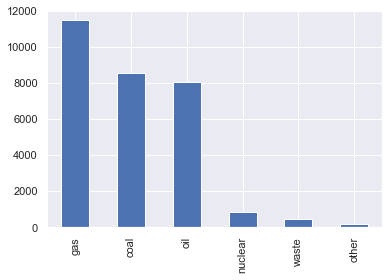

In [66]:
#visualizing the most used fuel type
df['fuel_type_code_pudl'].value_counts().plot(kind='bar')

In [88]:
df.groupby(['fuel_type_code_pudl','report_year']).agg({'fuel_type_code_pudl':'count'})

fuel_type_code_pudl
fuel_type_code_pudl report_year                     
coal                1994                         475
                    1995                         475
                    1996                         431
                    1997                         417
                    1998                         431
...                                              ...
waste               2014                          18
                    2015                          18
                    2016                          17
                    2017                          15
                    2018                          16

[148 rows x 1 columns]

In [68]:
fuel_burnt_per_year = df[['report_year','fuel_qty_burned']].groupby('report_year').sum()

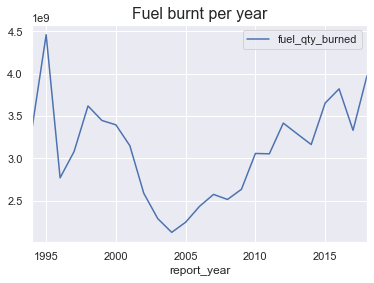

In [69]:
fuel_burnt_per_year.plot()
plt.title('Fuel burnt per year', fontsize=16)
plt.show()

In [70]:
#derive a column with the total cost of fuel burnt
df['Total_cost_of_fuel_burnt'] = df['fuel_qty_burned'] * df['fuel_cost_per_unit_burned']

In [71]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05


In [72]:
df['excess_fuel'] = df['fuel_cost_per_unit_delivered'] - df['fuel_cost_per_unit_burned']

In [73]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt,excess_fuel
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,-0.06
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,-0.05
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,-1.60
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,-1.22
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,0.00


In [74]:
df[df['excess_fuel'] < 0].head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt,excess_fuel
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,-0.06
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,-0.05
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,-1.60
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,-1.22
5,5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850,9.400704e+07,-0.99


In [75]:
#operational cost of the each plant
df.groupby(['plant_name_ferc1']).agg({'fuel_cost_per_mmbtu':'sum'})

,fuel_cost_per_mmbtu
plant_name_ferc1,
(1)sta98,3.3990
(2) scriba sta. 99,0.4990
(n) contra costa,2.1100
(n) pittsburg,2.1800
(n)(t)moss landing,2.2200
...,...
zimmer- aepgr share,25.3670
zion,1.4440
zorn,51.6810


In [76]:
df.groupby(['fuel_type_code_pudl']).agg({'fuel_cost_per_mmbtu':'sum'})

,fuel_cost_per_mmbtu
fuel_type_code_pudl,
coal,15275.11517
gas,62126.34574
nuclear,1404.14500
oil,102402.57762
other,25899.18000
waste,362815.08200


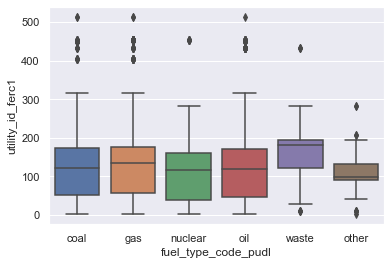

In [77]:
sns.boxplot(df['fuel_type_code_pudl'],df['utility_id_ferc1'])

In [78]:
df.describe()

,Unnamed: 0,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt,excess_fuel
count,29523.000000,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000,2.952300e+04,2.952300e+04
mean,14761.000000,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354,6.469307e+07,7.089214e+02
std,8522.700335,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939,1.268195e+09,6.880374e+04
min,0.000000,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000,-2.111377e+06,-8.340083e+04
25%,7380.500000,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000,2.920031e+05,-1.240000e+00
50%,14761.000000,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000,3.153365e+06,0.000000e+00
75%,22141.500000,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000,2.808622e+07,0.000000e+00
max,29522.000000,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000,9.280174e+10,7.964483e+06


In [82]:
df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt,excess_fuel
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,-0.06
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,-0.05
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,-1.60
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,-1.22
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,0.00


In [83]:
df.groupby(['fuel_type_code_pudl']).agg({'fuel_cost_per_unit_burned':'mean'})

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


In [84]:
df['fuel_qty_burned'].kurtosis()

651.3694501337732

In [85]:
df['fuel_qty_burned'].skew()

15.851495469109503

In [87]:
df.corr()

,Unnamed: 0,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,Total_cost_of_fuel_burnt,excess_fuel
Unnamed: 0,1.000000,0.095202,0.998994,0.013102,-0.112112,0.013806,-0.014195,0.010230,-0.014099,-0.014762
utility_id_ferc1,0.095202,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122,-0.012472,-0.014837
report_year,0.998994,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261,-0.013725,-0.014602
fuel_qty_burned,0.013102,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896,0.108019,-0.002781
fuel_mmbtu_per_unit,-0.112112,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884,0.030497,-0.008619
fuel_cost_per_unit_burned,0.013806,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437,0.173242,-0.030484
fuel_cost_per_unit_delivered,-0.014195,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109,0.001448,0.999139
fuel_cost_per_mmbtu,0.010230,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000,-0.000352,-0.000090
Total_cost_of_fuel_burnt,-0.014099,-0.012472,-0.013725,0.108019,0.030497,0.173242,0.001448,-0.000352,1.000000,-0.005740
excess_fuel,-0.014762,-0.014837,-0.014602,-0.002781,-0.008619,-0.030484,0.999139,-0.000090,-0.005740,1.000000


In [89]:
df.groupby(['report_year']).agg({'fuel_cost_per_unit_delivered':'mean'})

,fuel_cost_per_unit_delivered
report_year,
1994,63.636060
1995,32.735269
1996,9196.705948
1997,11140.197239
1998,287.154420
1999,25.551627
2000,985.362877
2001,60.050396
2002,47.594361


In [92]:
df.groupby(['fuel_type_code_pudl','report_year']).agg({'fuel_cost_per_unit_burned':'mean'})

fuel_cost_per_unit_burned
fuel_type_code_pudl report_year                           
coal                1994                         31.546467
                    1995                         30.677442
                    1996                         29.454299
                    1997                        104.897309
                    1998                         27.616234
...                                                    ...
waste               2014                         32.866333
                    2015                         34.959444
                    2016                         31.710529
                    2017                         30.138600
                    2018                         41.310750

[148 rows x 1 columns]